# Distributed Information Systems
### Prof. Karl Aberer <br> Final Exam, Spring Semester 2018

The following materials are allowed: exercise sheets
and solutions, past exams with your own solution, personally written notes and personally collected documentation.
  
The exam will be held on your computer, but digital communication by any means is strictly prohibited. You are not allowed to use any form of Web browsing, except to connect to Moodle and to download and upload the exam. By participating to this exam you agree to these conditions.

These are the instructions for the exam:
1. You are not allowed to leave the examination room in the first 20 and the last 15 minutes of the exam.
* We will publish 15 minutes before the end of the exam a password for uploading your solutions on Moodle.
* It is not recommended to leave the exam before the password is published. If you need to leave earlier contact us.

# Question 1: Multiple Choice Questions

Answer the [multiple choice questions in Moodle](https://moodle.epfl.ch/mod/quiz/view.php?id=988129) as in the quizzes.

The password for answering the quiz is: **wBHNcJZd**.

# Question 2: User Classification in Social Networks

Assume we would like to identify Twitter user accounts $T$ that have interest in Swiss universities.

Given that we have no training data, we analyse the social relationships of those users.

More specifically, we consider that users that follow an Twitter account $S$ related to a Swiss University (e.g. @EPFL, @EPFL\_en, @ETHZ etc.) show interest for Swiss universities. We assume that $S$ and $T$ are disjoint. We capture the follower relationship in a matrix $F$, where an entry $f_{ij} = 1$ indicates a follower link from user account $i\in T$ to university account $j\in S$. Otherwise the entry is zero.

We would like to assess the level of interest of users into Swiss universities by using two methods:
1. The HITS algorithm, where we consider the Swiss university accounts as authorities and the users we intend to classify as hubs. A high hub value $t_i$ for user $i\in T$ should indicate a high level of interest in Swiss universities, a high authority value $s_j$ indicates that university account $j\in S$ is a good indicator for interest in Swiss universities.
2. The EM algorithm, where we consider the existence of a follower link from a user to a Swiss university account as a positive feedback given that university account on the interest of the user , and the absence of such a link as negative feedback (i.e. we consider the university accounts like experts and the users like the item to be evaluated). A high level of positive feedback $t_i$ for user $i\in T$ indicates interest in Swiss universities, and a high expertise value $s_j$ indicates that university account $j\in S$ is a good indicator for interest in Swiss universities.

### Questions

1) Formulate the two algorithms (HITS and EM) using the following patterns for a recursive computation of $t$ and $s$

HITS:  $\vec{t}_{k+1} = r_1  M_1. \vec{v_1},\ \vec{s}_{k+1} = r_2  M_2 . \vec{v_2}$

EM:    $\vec{t}_{k+1} = r_3  M_3 . \vec{v_3},\ \vec{s}_{k+1} = r_4 (M_4.\vec{v_4} + M_5.\vec{v_5})$

$\vec{t}=(t_1,\ldots,t_n)$ and $\vec{s}=(s_1,\ldots,s_m)$ are the vectors ranking interest and expertise of users and universities. Your task is to express $r_p$, $\vec{v_p}$ and $M_p$, $p=1,\ldots,5$ in terms of $\vec{t}_{k}$, $\vec{s}_{k}$ and $F$, where $r_p$ are scalars, $\vec{v_p}$ are vectors and $M_p$ are matrices.

You can use also the following functions:

$|\vec{v}|_2$ for the 2-norm

$|\vec{v}|_1$ for the 1-norm

$M^t$ for the matrix transpose

$round(\vec{v})$ for rounding the values of a vector in $[0,1]$ to $0$ and $1$
 
2) For HITS: in which sense is the input to the algorithm a special case of the most general possible inputs? Which additional constraints does the formulation of the problem satisfy?

3) Assume after applying HITS or EM you perform a binary classification of the accounts by setting a threshold on the values in $\vec{t}$, i.e., all accounts with a authority/interest value above the threshold are considered as accounts interested in Swiss universities. Identify and shortly describe a simple, standard classification algorithm that uses the accounts with binary labels as training data to classify new accounts and that does not require training (and does not rely on recomputing HITS or EM).
  
Please provide your answers in the cell below:

1. 

$t_{k+1} = L s_k / || L s_k ||_2$

$s_{k+1} = L^T t_{k+1} / || L^T t_{k+1} ||_2$

2. In a more general formulation the S and T dont have to be disjoint. We consider that the nodes are either hubs or authorities and expect that the graph is bipartite.

3. We can use kNN as an algorithm that doesn't require training. We can find most k most similar accounts to the new given one (e.g the one with whitch it shares most subscribers) and then perform the majority voting for this algo.


# Question 3:  Betweenness Centrality in Social Networks
  
  
"Les misérables" is a novel written by Victor Hugo and is considered as one of the greatest novels of the 19th century. In this question, you will analyze the social network composed by the protagonists of the novel. The character network represents the interactions among character and has been created, by hand, by Donald E. Knuth.

In [1]:
import json
import pandas as pd
import operator
import networkx as nx
import matplotlib.pylab as plt
import matplotlib.colors as mcolors
from dis_helpers import *

In [2]:
G = ex1_load_graph()

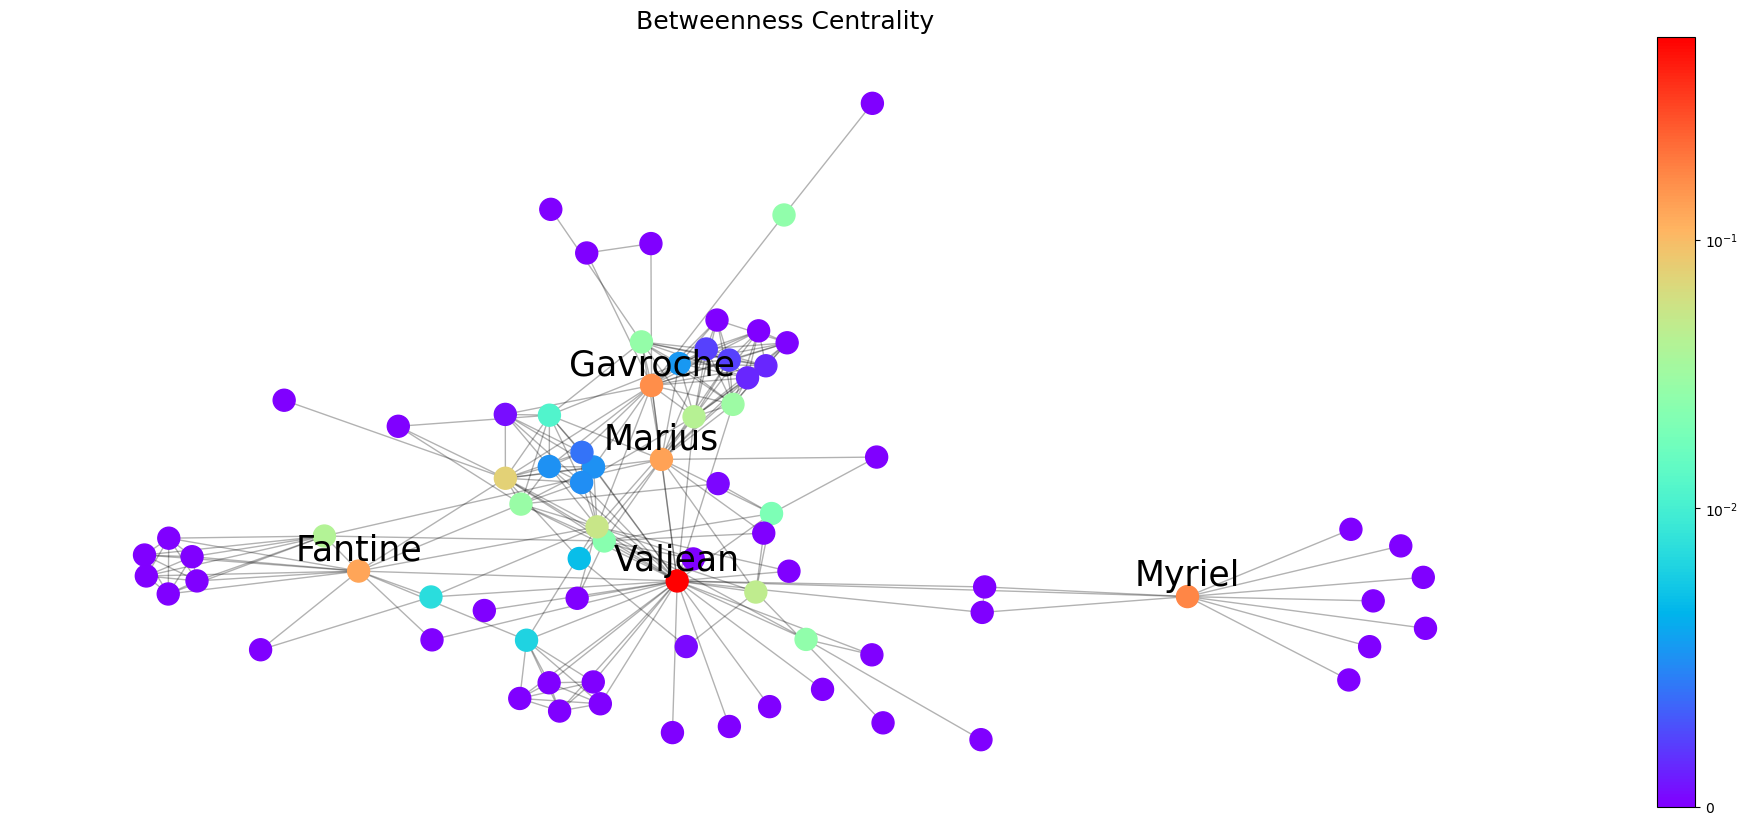

Betweeness centrality (unweighted):
--------------------------------------------------
Valjean          		 1624.47
Myriel           		 504.00
Gavroche         		 470.57
Marius           		 376.29
Fantine          		 369.49
Thenardier       		 213.47
Javert           		 154.84
Mlle.Gillenormand 		 135.66
Enjolras         		 121.28
Tholomyes        		 115.79


In [3]:
ex1_draw(G, nx.betweenness_centrality(G))
centr = nx.betweenness_centrality(G,normalized=False)

ex1_print_topn(centr,10)

### Definition

In this problem, you will have to implement node betweeness centrality, a measure that provide a score for every node $n$ of a graph $G$.  
  
Betweenness centrality $c_B(n)$ of a node $n$ is the sum of the fraction of all-pairs shortest paths that pass through $n$:  
  
$\Large c_B(n) =\sum_{s,t \in N} \frac{\sigma(s, t|n)}{\sigma(s, t)}$
  
where $N$ is the set of nodes, $\sigma(s, t)$ is the number of shortest paths connecting $s$ and $t$, and $\sigma(s, t|n)$ is the number of paths passing through node $n$, provided $n$ is different from $s$ and $t$. For the other cases $\sigma(s, t|n)$ is defined as follows: 
* If $s = t$: $\sigma(s, t) = 1$
* If $n \in \{s, t\}$: $\sigma(s, t|n) = 0$

Note that this definition of node betweenness employs no normalization.
  
### Code Cheat Sheet

Here we provide a few explainations about some of the functions you might need.

The function ``enumerate(['a','b','c'])`` provides a convenient way to create an index while iterating over a list. For example:

In [4]:
for i,n in enumerate(['Napoleon','Myriel','Mlle.Baptistine','Mme.Magloire']):
    print(i,n)

0 Napoleon
1 Myriel
2 Mlle.Baptistine
3 Mme.Magloire


The function ``nx.all_shortest_paths(G,s,t)`` returns a list of all the shortest paths between nodes $s$ and $t$, given the graph $G$. Note that you can directly use node labels to specify the nodes, such as in the example below:

In [5]:
for i in nx.all_shortest_paths(G,'Tholomyes','Mme.Magloire'):
    print(i)

['Tholomyes', 'Fantine', 'Valjean', 'Mme.Magloire']
['Tholomyes', 'Cosette', 'Valjean', 'Mme.Magloire']
['Tholomyes', 'Marius', 'Valjean', 'Mme.Magloire']


### Questions
1) Fill the code skeleton below to compute the betweenness centrality for every node of the graph.   

2) The proposed code skeleton has an unnecessary high time complexity. Can you propose a solution to decrease it? Please answer in the cell below. 

We don't have to recalculate the shortest paths between each pair for each node. Rather than that, we can for each pair calculate the shotest paths and then for each node check if they are a part of this path.

3) Does the PageRank algorithm always produce the same values as node betweenness, after normalizing the node betweenness values to the interval [0,1]? For PageRank, consider that every edge of the undirected graph is replaced by two directed edges going in both directions. Provide an answer and an argument to support your answer in the cell below. 

No, e.g for triangle graph node betweenness is (0, 0, 0) and Page rank is (0.33, 0.33, 0.33)

In [20]:
G_test = nx.from_numpy_array(np.array([[0, 1, 1], [1, 0, 1], [1, 1, 0]]))
print(G_test.nodes(), G_test.edges())
nodes = G_test.nodes()
betweenness = nx.betweenness_centrality(G_test)
pg = nx.pagerank_numpy(G_test, alpha=1)
print(betweenness, pg)

[0, 1, 2] [(0, 1), (0, 2), (1, 2)]
{0: 0.0, 1: 0.0, 2: 0.0} {0: 0.33333333333333337, 1: 0.33333333333333326, 2: 0.3333333333333333}


/var/folders/9t/5ml_m_x53vs0ydn7wx7l76l80000gn/T/ipykernel_48866/1338198977.py:5: DeprecationWarning: networkx.pagerank_numpy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  pg = nx.pagerank_numpy(G_test, alpha=1)
/Users/arinaruck/opt/anaconda3/envs/dist_is/lib/python3.9/site-packages/networkx/algorithms/link_analysis/pagerank_alg.py:354: FutureWarning: google_matrix will return an np.ndarray instead of a np.matrix in
NetworkX version 3.0.
  M = google_matrix(


In [10]:
characters = list(G.nodes())
result   = {}

# compute a score fo every character
for n in characters:

    # accumulator for the score of the current character
    accum = 0

    # shortest path FROM every character...
    for i,s in enumerate(characters):
        # ..TO every character
        for j,t in enumerate(characters):
            # we do not consider the same path twice
            if j > i:
                continue
            
            try:  
                all_short = nx.all_shortest_paths(G,s,t)

                if n == s or n == t:
                    continue
                
                total_paths = 0
                paths_through = 0
                for path in all_short:
                    total_paths += 1
                    paths_through += n in path

                accum += paths_through / total_paths
                
            except nx.NetworkXNoPath:
                continue
                
    result[n] = accum
    
ex1_print_topn(result,10)

Betweeness centrality (unweighted):
--------------------------------------------------
Valjean          		 1624.47
Myriel           		 504.00
Gavroche         		 470.57
Marius           		 376.29
Fantine          		 369.49
Thenardier       		 213.47
Javert           		 154.84
Mlle.Gillenormand 		 135.66
Enjolras         		 121.28
Tholomyes        		 115.79


# Question 4: Sentiment Classification of Movie Reviews
The goal of this problem is to build an end-to-end _Sentiment Classification_ pipeline. In order to achieve this, you will have to go through the subtasks that are indicated below and fill in the code in the respective placeholders. Notice that you are not allowed to use external libraries other than the ones that are already imported in the project.


In [21]:
#Required libraries.
import os
import string
import numpy as np
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [22]:
def read_corpus():
    '''Reads corpus from files.'''
    
    neg_reviews = []
    pos_reviews = []
    DIR = 'movie_reviews/'

    for l, sent in [(neg_reviews, 'neg'), (pos_reviews, 'pos')]:
        for file in os.listdir(DIR+sent):
            with open(os.path.join(DIR+sent, file)) as f:
                text = f.read()
            # split into words
            tokens = word_tokenize(text)
            # convert to lower case
            tokens = [w.lower() for w in tokens]
            # remove punctuation from each word
            table = str.maketrans('', '', string.punctuation)
            stripped = [w.translate(table) for w in tokens]
            # remove remaining tokens that are not alphabetic
            words = [word for word in stripped if word.isalpha()]
            # filter out stop words
            words = [w for w in words if not w in stop_words]

            l.append(' '.join(words))
    return neg_reviews, pos_reviews

### Task 1
Split your corpus into a training and a test set with ratio 9:1. 
* _Hint: Make sure that both sets are equally populated w.r.t. the two sentiments._

In [23]:
neg_reviews, pos_reviews = read_corpus()

In [27]:
seed = 42
train_size = 0.9

neg_reviews_train = []
pos_reviews_train = []

neg_reviews_test = []
pos_reviews_test = []

reviews_train = []
reviews_test = []

for reviews, train_cont, test_cont in [(neg_reviews, neg_reviews_train, neg_reviews_test), (pos_reviews, pos_reviews_train, pos_reviews_test)]:
    train_idx = np.random.choice(len(reviews), size=int(len(reviews) * train_size), replace=False)
    for i, review in enumerate(reviews):
        if i in train_idx:
            train_cont.append(review)
        else:
            test_cont.append(review)

In [51]:
neg_reviews_train[0]

'bad bad bad one word seems pretty much sums beyond valley dolls summary nt enough still nt got point director russ meyer predilection casting attractive large breasted women ultimately expose aforementioned anatomical areas really one reason recommend even taking look movie fact cowritten famed film critic roger ebert also responsible screenplay watching movie never able sit another one reviews gives movie thumbs bad writing straight face movie stinks loud quite frankly movie deserves parts bad almost funny giving maybe generous right opening credits knew classa bomb hands way credits actually shot distracting first scene see includes big breasted young woman chased guy nazi uniform absolutely idea hell happening get explained later soon first scene cut completely unrelated scene honest sat movie mesmerized incredibly awful actually forgot seemingly place opening popped later film quality writing rest film would nt surprised opening never explained movie ask like really matters ok goe

In [52]:
pos_reviews_train[0]

'assume nothing phrase perhaps one used first impressions rumors hardly ever seem phrase especially goes oscar novak architect main focus three tango delightful funny romantic comedy assumptions novak matthew perry shy clumsy chicago based architect along openly gay partner peter steinberg oliver platt fights projects day day one job restoring popular building charles newman dylan mcdermott rich wellknown businessman charles immediately takes liking oscar enjoys personality sense humor seeing oscar someone could trust charles asks watch girlfriend unpredictable adventurous girl named amy post neve campbell makes living blowing glass charles wants know talks goes point make sure seeing someone else course oscar gladly takes job meets amy art show sparks fly two get go oscar feels found one meant content idea amy well another popular phrase good things must come end stays true oscar well charles walks amy oscar drink one night oscar amy become great friends nt seem mind thinks oscar gay 

In [28]:
reviews_train = neg_reviews_train + pos_reviews_train
reviews_test = neg_reviews_test + pos_reviews_test

### Task 2
Transform the reviews of the training set into vectors using the Bag-Of-Words model. Each dimension of a vector must count the number of occurences of a word in the review.
* _Hint 1: Make sure that all the vectors belong to the same space._
* _Hint 2: For this task you can reuse code from the first exercise of DIS2018 (Vector Space Retrieval)._

In [29]:
def create_vocabulary(corpus, min_tf):
    '''Creates the vocabulary (set of distinct words) that appear more than $min_tf$ times in the corpus.'''
    
    count = {}
    for document in corpus:
        for word in document.split():
            if word in count:
                count[word] += 1
            else:
                count[word] = 0
    
    vocabulary = []
    for w, c in count.items():
        if c > min_tf:
            vocabulary.append(w)
    
    return vocabulary
    
vocabulary = create_vocabulary(reviews_train, len(reviews_train)*0.005)

In [32]:
vocabulary

['bad',
 'one',
 'word',
 'seems',
 'pretty',
 'much',
 'sums',
 'beyond',
 'valley',
 'dolls',
 'nt',
 'enough',
 'still',
 'got',
 'point',
 'director',
 'meyer',
 'casting',
 'attractive',
 'large',
 'women',
 'ultimately',
 'expose',
 'aforementioned',
 'areas',
 'really',
 'reason',
 'recommend',
 'even',
 'taking',
 'look',
 'movie',
 'fact',
 'famed',
 'film',
 'critic',
 'roger',
 'ebert',
 'also',
 'responsible',
 'screenplay',
 'watching',
 'never',
 'able',
 'sit',
 'another',
 'reviews',
 'gives',
 'thumbs',
 'writing',
 'straight',
 'face',
 'stinks',
 'loud',
 'quite',
 'frankly',
 'deserves',
 'parts',
 'almost',
 'funny',
 'giving',
 'maybe',
 'generous',
 'right',
 'opening',
 'credits',
 'knew',
 'bomb',
 'hands',
 'way',
 'actually',
 'shot',
 'distracting',
 'first',
 'scene',
 'see',
 'includes',
 'big',
 'young',
 'woman',
 'chased',
 'guy',
 'nazi',
 'uniform',
 'absolutely',
 'idea',
 'hell',
 'happening',
 'get',
 'explained',
 'later',
 'soon',
 'cut',
 'compl

In [68]:
def transform_to_vector(reviews):
    '''Transforms a list of reviews to a list of vectors.'''
    
    reviews_vec = []

    for review in reviews:
       
        vector = np.zeros(len(vocabulary))
        for word in review.split():
            if word in vocabulary:
                i = vocabulary.index(word)
                vector[i] += 1
        
        reviews_vec.append(vector)

    return reviews_vec

neg_reviews_train_vec = transform_to_vector(neg_reviews_train)
pos_reviews_train_vec = transform_to_vector(pos_reviews_train)

In [69]:
neg_reviews_train_vec[0].sum(), pos_reviews_train_vec[0].sum()

(482.0, 394.0)

### Task 3 
Aggregate the vectors of the positive and negative reviews of the training set into a single vector. This vector will be the representative vector of each of the two sentiments. Which aggregation function did you choose and why?

In [70]:
def aggregate_vector_list(vlist, aggfunc):
    if aggfunc == 'max':
        return np.array(vlist).max(axis=0)
    elif aggfunc == 'min':
        return np.array(vlist).min(axis=0)
    elif aggfunc == 'mean':
        return np.array(vlist).mean(axis=0)
    else:
        return np.zeros(np.array(vlist).shape[1])

############### ADD YOUR CODE HERE ###############
neg_reviews_repr = aggregate_vector_list(neg_reviews_train_vec, 'mean')
pos_reviews_repr =aggregate_vector_list(pos_reviews_train_vec, 'mean')
############### ADD YOUR CODE HERE ###############

In [71]:
pos_reviews_repr

array([0.34666667, 2.88222222, 0.10333333, ..., 0.01222222, 0.01222222,
       0.01444444])

In [72]:
neg_reviews_repr

array([0.99444444, 2.64666667, 0.11      , ..., 0.        , 0.        ,
       0.        ])

Answer: 

max over the the vocabulary axis would include all words mentioned in the negative reviews, 

min would include the words which are in all negative reviews (can be none), 

mean would probably average out the non sentiment specific words, while keeping the signal strong for common sentiment words.

### Task 4
Transform the reviews of the movies in the test set into vectors. 
* _Hint: Make sure that all the vectors belong to the same space as the ones from the training set._


In [73]:
############### ADD YOUR CODE HERE ###############
neg_reviews_test_vec = transform_to_vector(neg_reviews_test)
pos_reviews_test_vec = transform_to_vector(pos_reviews_test)
############### ADD YOUR CODE HERE ###############

### Task 5
Consider the following Naive Bayes sentiment classifier:

\begin{equation*}
P(sentiment | review)   = \frac{P(review | sentiment) * P(sentiment)}{P(review)}
\end{equation*}

Assume that you can estimate the likelihood probability as follows:

\begin{equation*}
P(review | sentiment) = cosine\_similarity(review\_vec, sentiment\_representative\_vec)
\end{equation*}

1) How do you take into account the probabilities: $P(sentiment)$ and $P(review)$?

Answer: we can consider that the reviews are distributed uniformly (unless we have repeating common reviews) and we can calculate p(sentiment) as the class balance in our dataset.

2) Implement the classifier and compute its performance in terms of false negatives, true negatives, falsepositives and true positives.

In [74]:
total_reviews = len(pos_reviews) + len(neg_reviews)
p_sentiment = {'pos': len(pos_reviews) / total_reviews, 'neg': len(neg_reviews) / total_reviews}
print(p_sentiment)
# since they are equal can ignore the probability of the sentiment

{'pos': 0.5, 'neg': 0.5}


In [75]:
fn = 0
tn = 0
fp = 0
tp = 0

def cosine_similarity(a,b):
    '''Computes the cosine similarity of $a$ and $b$.'''
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_product / (norm_a * norm_b)
    
############### ADD YOUR CODE HERE ###############

thr = 0.5

p_neg = [(cosine_similarity(neg_review, neg_reviews_repr), cosine_similarity(neg_review, pos_reviews_repr)) for neg_review in neg_reviews_test_vec]
p_pos = [(cosine_similarity(pos_review, neg_reviews_repr), cosine_similarity(pos_review, pos_reviews_repr)) for pos_review in pos_reviews_test_vec]

pred_neg = [np.argmax(p) for p in p_neg]
pred_pos = [np.argmax(p) for p in p_pos]

tn, fp = pred_neg.count(0), pred_neg.count(1)
tp, fn = pred_pos.count(1), pred_pos.count(0)


### Task 6
Compute the _F-measure_ to evaluate your classifier.

In [76]:
precision = 0
recall = 0
f_measure = 0

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f_measure = 2 * precision * recall / (precision + recall)


print('F-measure: ', f_measure)

F-measure:  0.693069306930693
